In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../data/box_builder_dataset/feature_frame.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

Check null values

In [5]:
df.isna().sum()

variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0
std_days_to_

In [6]:
df.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [8]:
binary_cols = ['outcome', 'ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']

for col in binary_cols:
    print(df[col].value_counts())
    print()

outcome
0.0    2847317
1.0      33232
Name: count, dtype: int64

ordered_before
0.0    2819658
1.0      60891
Name: count, dtype: int64

abandoned_before
0.0    2878794
1.0       1755
Name: count, dtype: int64

active_snoozed
0.0    2873952
1.0       6597
Name: count, dtype: int64

set_as_regular
0.0    2870093
1.0      10456
Name: count, dtype: int64



Let's see the values for outcome in relation to the other columns.

In [32]:
df.groupby('ordered_before')['outcome'].value_counts(normalize=True).unstack()

outcome,0.0,1.0
ordered_before,,
0.0,0.991777,0.008223
1.0,0.835033,0.164967


<Axes: xlabel='ordered_before'>

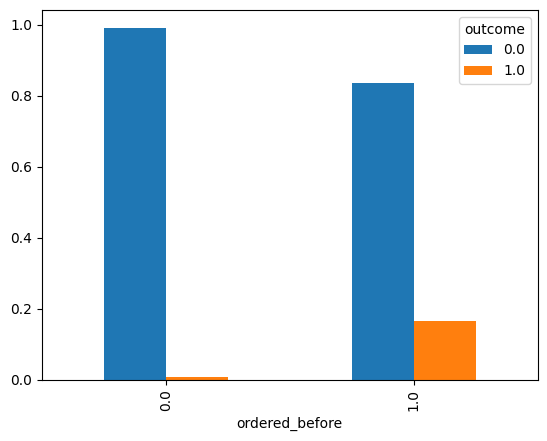

In [28]:
df.groupby('ordered_before')['outcome'].value_counts(normalize=True).unstack().plot(kind='bar')

In [31]:
df.groupby('abandoned_before')['outcome'].value_counts(normalize=True).unstack()

outcome,0.0,1.0
abandoned_before,,
0.0,0.988894,0.011106
1.0,0.282051,0.717949


<Axes: xlabel='abandoned_before'>

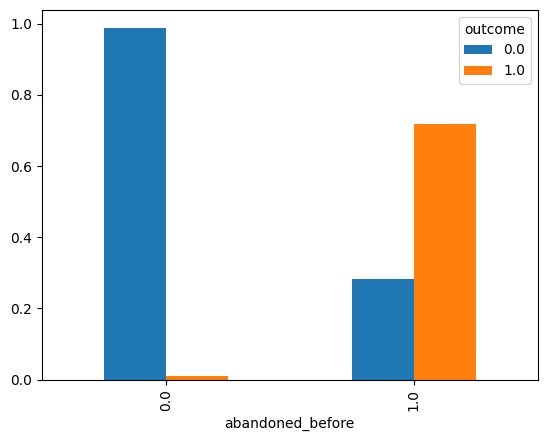

In [29]:
df.groupby('abandoned_before')['outcome'].value_counts(normalize=True).unstack().plot(kind='bar')

In [33]:
df.groupby('active_snoozed')['outcome'].value_counts(normalize=True).unstack()

outcome,0.0,1.0
active_snoozed,,
0.0,0.988697,0.011303
1.0,0.886464,0.113536


<Axes: xlabel='active_snoozed'>

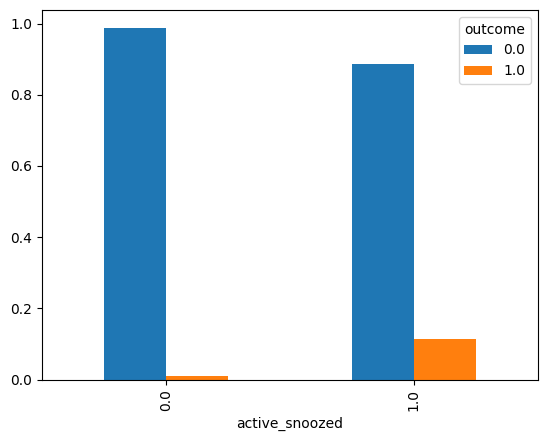

In [30]:
df.groupby('active_snoozed')['outcome'].value_counts(normalize=True).unstack().plot(kind='bar')

In [34]:
df.groupby('set_as_regular')['outcome'].value_counts(normalize=True).unstack()

outcome,0.0,1.0
set_as_regular,,
0.0,0.989331,0.010669
1.0,0.750287,0.249713


<Axes: xlabel='set_as_regular'>

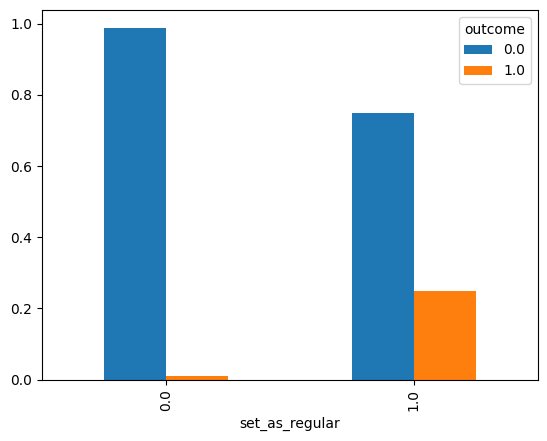

In [35]:
df.groupby('set_as_regular')['outcome'].value_counts(normalize=True).unstack().plot(kind='bar')

In [40]:
count_columns = [x for x in df.columns if x.startswith('count_')]
count_columns

['count_adults', 'count_children', 'count_babies', 'count_pets']

In [42]:
df[count_columns].describe()

,count_adults,count_children,count_babies,count_pets
count,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06
mean,2.017627e+00,5.492182e-02,3.538562e-03,5.134091e-02
std,2.098915e-01,3.276586e-01,5.938048e-02,3.013646e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,3.000000e+00,1.000000e+00,6.000000e+00


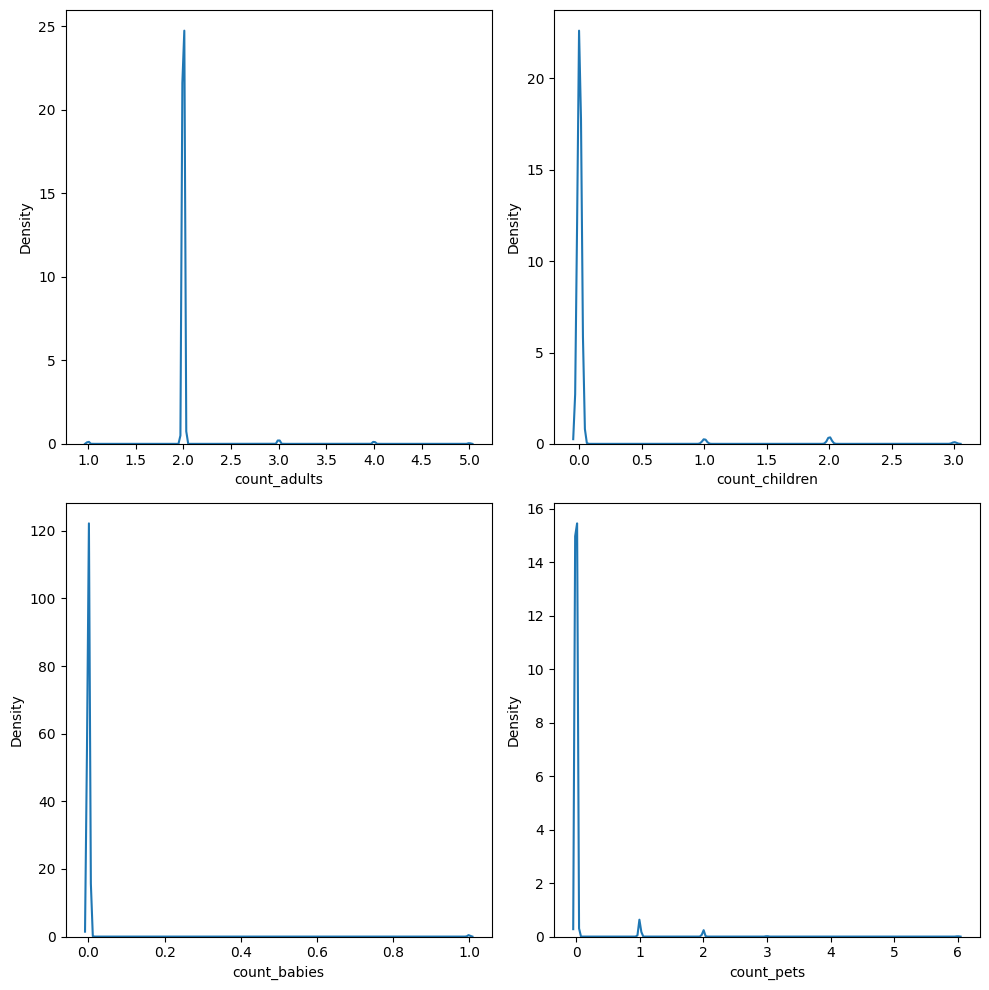

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
for index, col in enumerate(count_columns):
    sns.kdeplot(df, x=col, ax=ax[index])

plt.tight_layout()

It seems like the data has been imputed with the median value for the missing values.

In [45]:
df['discount_pct'].describe()

count    2.880549e+06
mean     1.862744e-01
std      1.934480e-01
min     -4.016064e-02
25%      8.462238e-02
50%      1.169176e-01
75%      2.234637e-01
max      1.325301e+00
Name: discount_pct, dtype: float64